In [1]:
# Load dataset
import pandas as pd
data = pd.read_csv('banking.csv')

# Have a quick look 
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [2]:
import numpy as np
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [3]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [4]:
# Delete 'unknown' value

cat_cols = data.select_dtypes(include=object).columns.tolist()

for col in cat_cols:
    # delete each columns that has value 'unknown' 
    index_names = data[ data[col] == 'unknown' ].index 
  
    # drop these row indexes from dataFrame 
    data.drop(index_names, inplace = True) 

In [5]:
data = data.drop("default", axis=1)

Class 0: 26629
Class 1: 3859
Proportion: 6.9 : 1


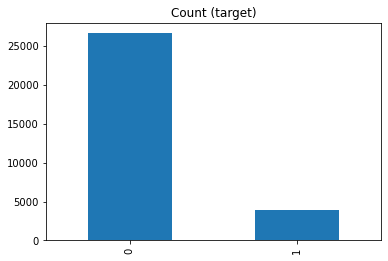

In [7]:
## Let's see how unbalanced the dataset is
target_count = data.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [6]:
# Split X and y
X = data.drop('y', axis=1).copy()
y = data['y'].copy()

In [8]:
# One-hot Encoding
cat_cols = data.select_dtypes(include=object).columns.tolist()
X_encoded = pd.get_dummies(X, columns=cat_cols)
X_encoded.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
5,30,68,8,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
6,37,204,1,999,0,-1.8,92.893,-46.2,1.327,5099.1,...,0,0,0,0,1,0,0,0,1,0


In [9]:
# Split training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

In [10]:
from sklearn.preprocessing import scale
# Scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [11]:
# Build Logistc Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# L1 penalty
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100]

# Create hyperparameter options
hyperparameters = dict(C=C)

# Create grid search using 5-fold cross validation
grid_search = GridSearchCV(logreg_l1, hyperparameters, cv=5, verbose=1, scoring='roc_auc', n_jobs=2)

grid_result = grid_search.fit(X_train_scaled, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:   44.9s finished


Best: 0.927684 using {'C': 1}


In [12]:
## It turns out our best parameter is 1
clf_lr = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=0)
clf_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')

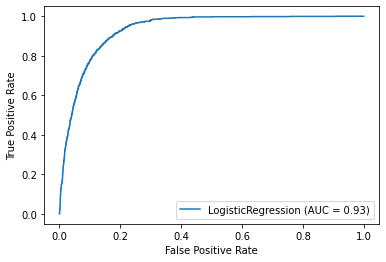

In [13]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_lr, X_test_scaled, y_test) 

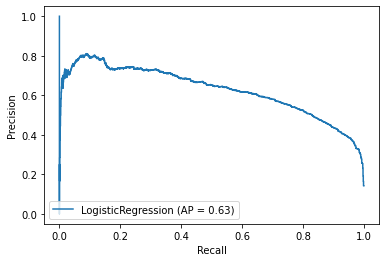

In [14]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf_lr, X_test_scaled, y_test) 

In [22]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)

In [23]:
X_train_new = scale(os_data_X)
y_train_new = os_data_y

In [24]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 0 in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of 1",len(os_data_y[os_data_y['y']==1]))
print("Proportion of 0 data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  37358
Number of 0 in oversampled data 18679
Number of 1 18679
Proportion of 0 data in oversampled data is  0.5
Proportion of 1 data in oversampled data is  0.5


In [25]:
# Build Logistc Regression Model
grid_search = GridSearchCV(logreg_l1, hyperparameters, cv=5, verbose=1, scoring='roc_auc', n_jobs=2)
grid_result = grid_search.fit(X_train_new, y_train_new)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  1.2min finished


Best: 0.981251 using {'C': 0.01}


In [27]:
## It turns out our best parameter is 0.01
clf_lr_after = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, random_state=0)
clf_lr_after.fit(X_train_new, y_train_new)

LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear')

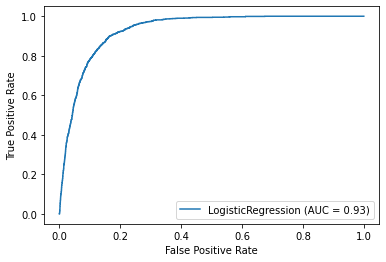

In [28]:
plot_roc_curve(clf_lr_after, X_test_scaled, y_test)

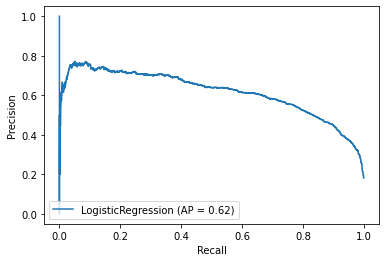

In [29]:
plot_precision_recall_curve(clf_lr_after, X_test_scaled, y_test)

# Changing ratio

In [30]:
from sklearn.metrics import roc_auc_score

In [33]:
def score_diff(df, y_name, ratio=None):
    
    """
    This function return the difference of percentage of auc score before and after oversampling using SMOTE.
    """
    assert type(y_name) == str, 'y_name must be a string'
    
    if ratio == None:
        df_new = df
    else:
        from sklearn.utils import resample

        df_0 = df[df[y_name] == 0]
        df_1 = df[df[y_name] == 1]

        # oversample df_1
        frac = df_0.shape[0] / (ratio * df_1.shape[0])
        df_0_new = df_0
        df_1_new = df_1.sample(frac=frac, random_state=0)
        
        print('The ratio of the dataset is', df_0_new.shape[0]/df_1_new.shape[0],':1')
    
        df_new = pd.concat([df_0_new, df_1_new])
    
    # Split X and y
    X = df_new.drop(y_name, axis=1)
    y = df_new[y_name]
    
    # One-hot Encoding
    cat_cols = data.select_dtypes(include=object).columns.tolist()
    X_encoded = pd.get_dummies(X, columns=cat_cols)
    
    # Split training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)
    
    # Scale
    X_train_scaled = scale(X_train)
    X_test_scaled = scale(X_test)
    
    # Hyperparamter tuning
    logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=0)

    # Create regularization hyperparameter space
    C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

    # Create hyperparameter options
    hyperparameters = dict(C=C)

    # Create grid search using 5-fold cross validation
    grid_search = GridSearchCV(logreg_l1, hyperparameters, cv=5, verbose=1, scoring='roc_auc', n_jobs=2)

    grid_result = grid_search.fit(X_train_scaled, y_train)
    
    best_C = grid_result.best_params_.get('C')
    print(best_C)
    
    # Build model before oversampling
    clf_lr = LogisticRegression(penalty='l1', solver='liblinear', C=best_C)
    clf_lr.fit(X_train_scaled, y_train)
    
    # Compute first auc score
    fir_auc_score = roc_auc_score(y_test, clf_lr.decision_function(X_test_scaled))
    print(fir_auc_score)
    
    # Oversampling
    os = SMOTE(random_state=0)

    X_train_new, y_train_new=os.fit_resample(X_train, y_train)
    
    X_train_scaled_new = scale(X_train_new)
    
    # hyperparameter_tuning
    grid_result_new = grid_search.fit(X_train_scaled_new, y_train_new)
    
    best_C_new = grid_result_new.best_params_.get('C')
    print(best_C_new)
    
    # Build model after oversampling
    clf_lr_after = LogisticRegression(penalty='l1', solver='liblinear', C=best_C_new)
    clf_lr_after.fit(X_train_scaled_new, y_train_new)
    
    # Compute second auc score
    secon_auc_score = roc_auc_score(y_test, clf_lr_after.decision_function(X_test_scaled))
    print(secon_auc_score)
    
    return (secon_auc_score - fir_auc_score) 




In [34]:
score_diff(data, 'y', 20)

The ratio of the dataset is 20.006761833208113 :1
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:  1.3min finished


0.01
0.9257831698647081
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:  1.8min finished


0.01
0.9287730391702406


0.0029898693055324665

In [35]:
score_diff(data, 'y', 50)

The ratio of the dataset is 49.96060037523452 :1
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:  1.9min finished


0.1
0.90891940554401
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:  1.1min finished


0.01
0.9241309469369398


0.015211541392929795

In [36]:
score_diff(data, 'y', 100)

The ratio of the dataset is 100.10902255639098 :1
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:   47.1s finished


0.1
0.8994868398820522
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed:   26.5s finished


0.01
0.9102528464989018


0.010766006616849566